# Support Vector Machine (SVM)

## Importing the libraries

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [41]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [42]:
X = dataset.iloc[:, :-1].values
X[:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]], dtype=int64)

In [43]:
y = dataset.iloc[:, -1].values
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [44]:
#y = y.reshape(len(y),1)
#y.shape

## Splitting the dataset into the Training set and Test set

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [46]:
X_train[:5]

array([[    44,  39000],
       [    32, 120000],
       [    38,  50000],
       [    32, 135000],
       [    52,  21000]], dtype=int64)

In [47]:
X_test[:5]

array([[   30, 87000],
       [   38, 50000],
       [   35, 75000],
       [   30, 79000],
       [   35, 50000]], dtype=int64)

In [48]:
y_train[:5]

array([0, 1, 0, 1, 1], dtype=int64)

In [49]:
y_test[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [50]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(300, 2)
(300,)
(100, 2)
(100,)


## Feature Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
X_train[:5]

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358]])

In [53]:
X_test[:5]

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ]])

## Training the SVM model on the Training set

In [54]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Predicting a new result

In [56]:
classifier.predict(sc.transform([[30,87000]]))

array([0], dtype=int64)

## Predicting the Test set results

In [58]:
y_pred = classifier.predict(X_test)
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [69]:
y_pred_test = np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)
y_pred_test[:5]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

## Making the Confusion Matrix

0.9

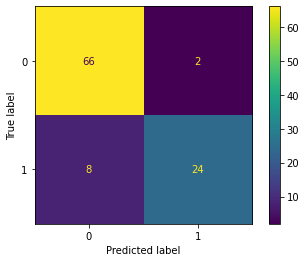

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
accuracy_score(y_test,y_pred)

## Visualising the Training set results

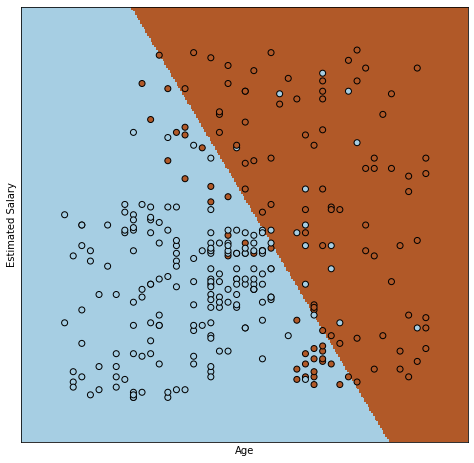

In [70]:
# Plot the decision boundary. For that, we will assign a color to each

# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5

h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(8, 8), facecolor='white')
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
#plt.figure(facecolor='red')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

## Visualising the Test set results

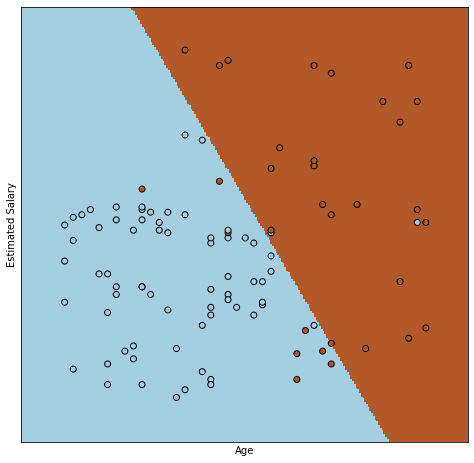

In [71]:
# Plot the decision boundary. For that, we will assign a color to each

# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_test[:, 0].min() - .5, X_test[:, 0].max() + .5
y_min, y_max = X_test[:, 1].min() - .5, X_test[:, 1].max() + .5

h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(8, 8), facecolor='white')
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the test points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired)
#plt.figure(facecolor='red')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()